In [1]:
import twitter

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = 'ZzZKRgcj60firpUPzh9jgBGhO'
CONSUMER_SECRET = '0ShSdfeK3UPCXLufZPN9LdKdC26ZqMTmxBwNrbHATnQZqCBMhd'
OAUTH_TOKEN ='836821070606925824-y49jhJAru1xfzqRJaCCMSCwgmyzlOJE' 
OAUTH_TOKEN_SECRET = 'QwH6dZjuur89RjCrC2PF1aC1FjqQa08h7w0vYyJSYIx2E'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                          CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)


# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

In [2]:
pip install twitter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977 #The code has changed in the WOEIDS: https://www.woeids.com/

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'trends': [{'name': 'Rashford', 'url': 'http://twitter.com/search?q=Rashford', 'promoted_content': None, 'query': 'Rashford', 'tweet_volume': 235147}, {'name': '#MUNMCI', 'url': 'http://twitter.com/search?q=%23MUNMCI', 'promoted_content': None, 'query': '%23MUNMCI', 'tweet_volume': 233558}, {'name': '#ManchesterDerby', 'url': 'http://twitter.com/search?q=%23ManchesterDerby', 'promoted_content': None, 'query': '%23ManchesterDerby', 'tweet_volume': 73500}, {'name': '#MUFC', 'url': 'http://twitter.com/search?q=%23MUFC', 'promoted_content': None, 'query': '%23MUFC', 'tweet_volume': 261953}, {'name': '#大病院占拠', 'url': 'http://twitter.com/search?q=%23%E5%A4%A7%E7%97%85%E9%99%A2%E5%8D%A0%E6%8B%A0', 'promoted_content': None, 'query': '%23%E5%A4%A7%E7%97%85%E9%99%A2%E5%8D%A0%E6%8B%A0', 'tweet_volume': 142702}, {'name': 'Arsenal', 'url': 'http://twitter.com/search?q=Arsenal', 'promoted_content': None, 'query': 'Arsenal', 'tweet_volume': 177494}, {'name': 'Haaland', 'url': 'http://twitter.com/se

In [4]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

Rashford
#MUNMCI
#ManchesterDerby
#MUFC
#大病院占拠
Arsenal
Haaland
#GGMU
Ten Hag
Casemiro
Garnacho
Guardiola
Akanji
Grealish
Man U
Old Trafford
Man City
Ederson
Martial
راشفورد
Bruno Fernandes
Henderson
Mitoma
اليونايتد
Brighton
菊池風磨
Julián
De Bruyne
Dnipro
Malacia
مانشستر
Rodri
ブライトン
Offside
Luke Shaw
Konate
風磨くん
Wan Bissaka
Foden
ユナイテッド
火古戦場
Rashy
السيتي
Josef
Varane
Howard Webb
Eriksen
おやーんず
10 DAYS FOR PATHAAN
第359回


In [5]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

Rashford
#ManchesterDerby
#MUNMCI
#MUFC
#GGMU
#Caturday
Arsenal
Casemiro
Man U
Haaland
Ten Hag
Garnacho
Grealish
Man City
Ederson
Martial
Akanji
Old Trafford
Snopes
Mitoma
Good Saturday
Brighton
Konate
Rodri
Fernandes
Malacia
Hendo
Antony
Henderson
Tim Howard
Maine
Hobby Lobby
Mahrez
LULLABY CONCEPT PHOTO
Foden
MEET DAY
Eriksen
Luke Shaw
PGMOL
Dnipro
Guardiola
Dave Grohl
Varane
Caicedo
De Bruyne
Cancelo
Daily Quordle 355
Bernardo
Wan Bissaka
COME ON UNITED


In [6]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Grealish', 'Martial', 'Ederson', 'Rashford', 'De Bruyne', 'Rodri', 'Old Trafford', 'Konate', 'Arsenal', 'Man City', 'Henderson', '#MUFC', 'Varane', '#GGMU', 'Man U', 'Akanji', 'Dnipro', '#ManchesterDerby', 'Brighton', 'Mitoma', 'Luke Shaw', 'Guardiola', 'Wan Bissaka', 'Garnacho', 'Malacia', 'Foden', 'Casemiro', 'Eriksen', 'Haaland', '#MUNMCI', 'Ten Hag'}


In [7]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#MothersDay' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "created_at": "Sat Jan 14 15:40:36 +0000 2023",
 "id": 1614286368502583296,
 "id_str": "1614286368502583296",
 "text": "RT @hiduplagi_id: Meskipun udah gede gini, ada banyak hal yang kita nggak tau dan cuma bisa dapet dari Ibu. \n\nDi spesial Hari Ibu, apa hal\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "hiduplagi_id",
    "name": "Hidup Lagi",
    "id": 1306484819233132544,
    "id_str": "1306484819233132544",
    "indices": [
     3,
     16
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "in",
  "result_type": "recent"
 },
 "source": "<a href=\"https://mobile.twitter.com\" rel=\"nofollow\">Twitter Web App</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name

In [8]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @hiduplagi_id: Meskipun udah gede gini, ada banyak hal yang kita nggak tau dan cuma bisa dapet dari Ibu. 

Di spesial Hari Ibu, apa hal…
Favorites:  0
Retweets:  227

Get my art printed on awesome products at Redbubble #RBandME https://t.co/Ml67UkVH4P… #findyourthing #redbubble… https://t.co/HSNJIX5Unk
Favorites:  0
Retweets:  0

Be unique, be different, buy an alternative #Logo from Buckshot https://t.co/DOHN1RsqCg… #uniquegifts #redbubble… https://t.co/3qNxHNZh9r
Favorites:  0
Retweets:  0

Get my art printed on awesome products at Redbubble #RBandME https://t.co/ai87pFNxi8… #findyourthing #redbubble… https://t.co/GrJJvP8s5U
Favorites:  0
Retweets:  0

Just look at these beautiful hand painted candles by Love Letters! A perfect #mothersday &amp; #easter gift. Pop the da… https://t.co/Wrg0Rnt3jm
Favorites:  0
Retweets:  0

Get my art printed on awesome products at Redbubble #RBandME https://t.co/81vJJsNZLh… #findyourthing #redbubble… https://t.co/VfXOXO7DNf
Favorites:  1
Retweets:

In [9]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @hiduplagi_id: Meskipun udah gede gini, ada banyak hal yang kita nggak tau dan cuma bisa dapet dari Ibu. \n\nDi spesial Hari Ibu, apa hal\u2026",
 "Get my art printed on awesome products at Redbubble #RBandME https://t.co/Ml67UkVH4P\u2026 #findyourthing #redbubble\u2026 https://t.co/HSNJIX5Unk",
 "Be unique, be different, buy an alternative #Logo from Buckshot https://t.co/DOHN1RsqCg\u2026 #uniquegifts #redbubble\u2026 https://t.co/3qNxHNZh9r",
 "Get my art printed on awesome products at Redbubble #RBandME https://t.co/ai87pFNxi8\u2026 #findyourthing #redbubble\u2026 https://t.co/GrJJvP8s5U",
 "Just look at these beautiful hand painted candles by Love Letters! A perfect #mothersday &amp; #easter gift. Pop the da\u2026 https://t.co/Wrg0Rnt3jm"
]
[
 "hiduplagi_id",
 "okx",
 "Hipollyti",
 "TheLitGiftShop",
 "okx"
]
[
 "RBandME",
 "findyourthing",
 "redbubble",
 "Logo",
 "uniquegifts"
]
[
 "RT",
 "@hiduplagi_id:",
 "Meskipun",
 "udah",
 "gede"
]


In [10]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('my', 344), ('printed', 329), ('at', 328), ('on', 327), ('Get', 321), ('art', 321), ('awesome', 321), ('Redbubble', 321), ('#RBandME', 321), ('products', 316)]

[('okx', 34), ('CharmelLtd', 27), ('HuobiGlobal', 16), ('Nirab23', 8), ('Islam_pfr', 7), ('Etsy', 5), ('hdayrdesign', 5), ('Hipollyti', 4), ('elahe4peace', 4), ('woodenyoulove', 4)]

[('RBandME', 321), ('redbubble', 311), ('findyourthing', 294), ('MothersDay', 96), ('mothersday', 40), ('crypto', 34), ('SpecialDay', 34), ('OKX', 34), ('uniquegifts', 27), ('artist', 17)]



In [12]:
pip install prettytable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-----------+-------+
| Word      | Count |
+-----------+-------+
| my        |   344 |
| printed   |   329 |
| at        |   328 |
| on        |   327 |
| Get       |   321 |
| art       |   321 |
| awesome   |   321 |
| Redbubble |   321 |
| #RBandME  |   321 |
| products  |   316 |
+-----------+-------+
+---------------+-------+
| Screen Name   | Count |
+---------------+-------+
| okx           |    34 |
| CharmelLtd    |    27 |
| HuobiGlobal   |    16 |
| Nirab23       |     8 |
| Islam_pfr     |     7 |
| Etsy          |     5 |
| hdayrdesign   |     5 |
| Hipollyti     |     4 |
| elahe4peace   |     4 |
| woodenyoulove |     4 |
+---------------+-------+
+---------------+-------+
| Hashtag       | Count |
+---------------+-------+
| RBandME       |   321 |
| redbubble     |   311 |
| findyourthing |   294 |
| MothersDay    |    96 |
| mothersday    |    40 |
| crypto        |    34 |
| SpecialDay    |    34 |
| OKX           |    34 |
| uniquegifts   |    27 |
| artist        

In [14]:
pip install prettyTable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.22829615666561945
0.32432432432432434
0.16281512605042017
15.915


In [16]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-------------+---------------------+----------------------------------------------------+
| Count | Screen Name | Tweet ID            | Text                                               |
+-------+-------------+---------------------+----------------------------------------------------+
| 5862  | Hipollyti   | 1523030740510056449 | RT @Hipollyti: I think every working mom probably  |
|       |             |                     | feels the same thing. You go through a big chunk   |
|       |             |                     | of time where you’re just thinking : Thi…          |
| 5862  | Hipollyti   | 1523030740510056449 | RT @Hipollyti: I think every working mom probably  |
|       |             |                     | feels the same thing. You go through a big chunk   |
|       |             |                     | of time where you’re just thinking : Thi…          |
| 5862  | Hipollyti   | 1523030740510056449 | RT @Hipollyti: I think every working mom probably  |
|       | 

In [17]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'ShinobiSasha', 'livingmybestie', 'Rockawaytheday']


In [18]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 0, 'Word Rank')

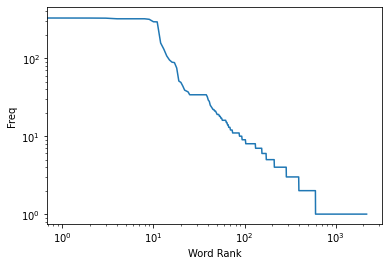

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

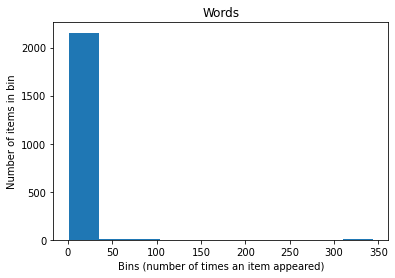

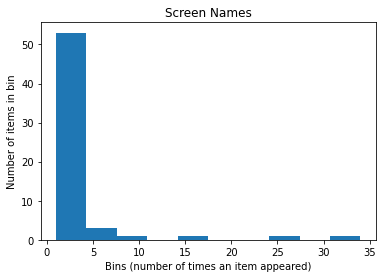

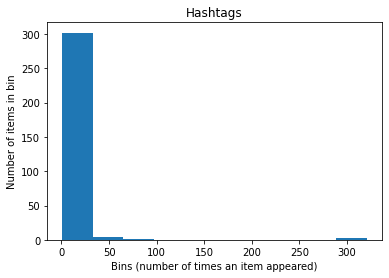

<Figure size 432x288 with 0 Axes>

In [20]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

Text(0, 0.5, 'Number of tweets in bin')

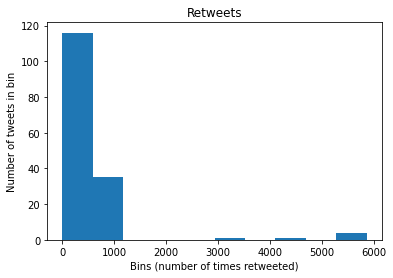

In [21]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')